In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.stats as stat
import scipy
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
from psynlig import plot_correlation_heatmap
import pingouin as pg
from scipy.stats import pearsonr
import plotly.express as px
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import kaleido

C:\Users\MiguelW12\PycharmProjects\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
%matplotlib inline
# from pptx import Presentation
# from pptx.util import Inches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.manifold import TSNE
from colour import Color
from sklearn.covariance import EllipticEnvelope
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
#from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
from psynlig import plot_correlation_heatmap
#import pingouin as pg
from scipy.stats import pearsonr
import plotly.express as px
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import chart_studio as cs
import numpy as np
import pandas as pd
import scipy
import chart_studio.plotly as py
from plotly.offline import iplot
import pandas as pd
import numpy as np  
%matplotlib inline  
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import chart_studio.plotly as py
from sklearn import preprocessing
from pandas.plotting import scatter_matrix 
from psynlig import plot_correlation_heatmap
#import pingouin as pg
from scipy.stats import pearsonr

In [3]:
import plotly.graph_objs as go
import plotly.express as px

In [2]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
import os
import glob
import random

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
%matplotlib inline
from pptx import Presentation 
from pptx.util import Inches 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.manifold import TSNE
from colour import Color
import matplotlib as mpl
import scipy, random
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from pandas.api.types import CategoricalDtype

In [4]:
##functions segment

Output folder created


In [7]:
def summarize_dataframe(df, group_col):
    """
    This function takes a pandas DataFrame and a column to group by as inputs and returns
    a summary DataFrame with statistical parameters for each group.
    """
    # Group the DataFrame by the specified column
    grouped_df = df.groupby(group_col)
   
    # Define a dictionary to hold the statistical parameters to compute for each column
    agg_dict = {}
   
    # Loop over the columns in the DataFrame and add the statistical parameters to the agg_dict
    for col in df.columns:
        if col != group_col:
            agg_dict[col] = [
                ('count', 'count'),
                ('mean', 'mean'),
                ('std', 'std'),
                ('min', 'min'),
                ('25%', lambda x: np.quantile(x, 0.25)),
                ('median', 'median'),
                ('75%', lambda x: np.quantile(x, 0.75)),
                ('max', 'max')
                
            ]
   
    # Compute the summary statistics for each group and column using the agg_dict
    summary_df = grouped_df.agg(agg_dict)
   
    # Flatten the multi-index column names into a single level
    summary_df.columns = [f'{col}_{stat}' for col, stat in summary_df.columns]
   
    # Rename the index column
    summary_df.index.name = group_col
   
    # Return the summary DataFrame
    return summary_df

In [8]:
def dist_check(df):
    
        for col in df:
            #Nh_df_24 = Nh_df_24.drop(columns=["PC", "group_with_pc", "group", "group_with_id"])
            plt.hist(df[col])
            plt.title(f"Histogram of ({col})")
            plt.xlabel(f"log({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(path + '//' + f"hist{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(df[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(path + '//' + f"Q-Q{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(df[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(path + '//' + f"dist{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")
        

In [9]:
def compute_scores(df, output_file1):
    up_scores = []
    low_scores = []
    above_count = []
    below_count = []
    for col in df.columns:
        up_score = df[col].mean() + 3 * df[col].std()
        low_score = df[col].mean() - 3 * df[col].std()
        above = df[df[col] > up_score]
        below = df[df[col] < low_score]
        above_count.append(len(above))
        below_count.append(len(below))
        df = df[(df[col] >= low_score) & (df[col] <= up_score)]
        up_scores.append(up_score)
        low_scores.append(low_score)
    output = pd.DataFrame({'Column': df.columns, 'Up Score': up_scores, 'Low Score': low_scores, 'Above Count': above_count, 'Below Count': below_count})
    output.to_csv(output_file1, index=False)
    return df

In [10]:
def compute_iqr(df, output_file2):
    up_bounds = []
    low_bounds = []
    above_count = []
    below_count = []
    for col in df.columns:
        percentile25th = df[col].quantile(0.25)
        percentile75th = df[col].quantile(0.75)
        iqr = percentile75th - percentile25th
        up_bound = percentile75th + 1.5 * iqr
        low_bound = percentile25th - 1.5 * iqr
        above = df[df[col] > up_bound]
        below = df[df[col] < low_bound]
        above_count.append(len(above))
        below_count.append(len(below))
        df = df[(df[col] >= low_bound) & (df[col] <= up_bound)]
        up_bounds.append(up_bound)
        low_bounds.append(low_bound)
    output = pd.DataFrame({'Column': df.columns, 'Up Bound': up_bounds, 'Low Bound': low_bounds, 'Above Count': above_count, 'Below Count': below_count})
    output.to_csv(output_file2, index=False)
    return df

In [11]:
def compute_percentiles(df, output_file3):
    up_bounds = []
    low_bounds = []
    above_count = []
    below_count = []
    for col in df.columns:
        percentile_low = df[col].quantile(0.01)
        percentile_high = df[col].quantile(0.99)
        up_bound = percentile_high 
        low_bound = percentile_low
        above = df[df[col] > percentile_high]
        below = df[df[col] < percentile_low]
        above_count.append(len(above))
        below_count.append(len(below))
        df = df[(df[col] >= percentile_low) & (df[col] <= percentile_high)]
        up_bounds.append(up_bound)
        low_bounds.append(low_bound)
    output = pd.DataFrame({'Column': df.columns, 'Up Bound': up_bounds, 'Low Bound': low_bounds, 'Above Count': above_count, 'Below Count': below_count})
    output.to_csv(output_file3, index=False)
    return df

In [17]:
## addidtions 

In [10]:
def percentile_analysis(df):
    # Compute 99th and 1st percentiles for each column
    up_perc = df.quantile(0.99)
    low_perc = df.quantile(0.01)

    # Count number of values above the 99th percentile and below the 1st percentile for each column
    above_up = df > up_perc
    below_low = df < low_perc
    num_above_up = above_up.sum()
    num_below_low = below_low.sum()

    # Create a new DataFrame without values above the 99th percentile or below the 1st percentile for each column
    df_filtered = df.mask(above_up, up_perc, axis=1).mask(below_low, low_perc, axis=1)

    # Create a summary DataFrame with the number of values above the 99th percentile and below the 1st percentile for each column
    summary = pd.DataFrame({'num_above_up': num_above_up, 'num_below_low': num_below_low})

    # Return the summary DataFrame and the filtered DataFrame
    return summary, df_filtered


In [11]:
def compute_scores(df):
    up_scores = []
    low_scores = []
    above_counts = []
    below_counts = []
    new_df = pd.DataFrame()

    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        up_score = mean + 3 * std
        low_score = mean - 3 * std

        # Count how many values are above/below the up_score/low_score
        above_count = len(df[df[col] > up_score])
        below_count = len(df[df[col] < low_score])

        # Remove values that are above the up_score or below the low_score
        new_col = df[col][(df[col] <= up_score) & (df[col] >= low_score)]

        # Add the new column to the new dataframe
        new_df[col] = new_col

        # Save the results
        up_scores.append(up_score)
        low_scores.append(low_score)
        above_counts.append(above_count)
        below_counts.append(below_count)

    # Add the scores and counts to the new dataframe
    new_df['above_count'] = above_counts
    new_df['below_count'] = below_counts
    new_df['up_score'] = up_scores
    new_df['low_score'] = low_scores

    return new_df

In [12]:
def compute_bounds(df):
    up_bounds = []
    low_bounds = []
    above_counts = []
    below_counts = []
    new_df = pd.DataFrame()

    for col in df.columns:
        q25 = df[col].quantile(0.25)
        q75 = df[col].quantile(0.75)
        iqr = q75 - q25
        up_bound = q75 + 1.5 * iqr
        low_bound = q25 - 1.5 * iqr

        # Count how many values are above/below the up_bound/low_bound
        above_count = len(df[df[col] > up_bound])
        below_count = len(df[df[col] < low_bound])

        # Remove values that are above the up_bound or below the low_bound
        new_col = df[col][(df[col] <= up_bound) & (df[col] >= low_bound)]

        # Add the new column to the new dataframe
        new_df[col] = new_col

        # Save the results
        up_bounds.append(up_bound)
        low_bounds.append(low_bound)
        above_counts.append(above_count)
        below_counts.append(below_count)

    # Add the bounds and counts to the new dataframe
    new_df['above_count'] = above_counts
    new_df['below_count'] = below_counts
    new_df['up_bound'] = up_bounds
    new_df['low_bound'] = low_bounds

    return new_df


In [8]:
def dist_check_if_pre(frame):
    
    print("frame_ready")
    for col in frame:
            
            plt.hist(frame[col])
            plt.title(f"Histogram of log({col})")
            plt.xlabel(f"log({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(curr_out_path + '//' + f"hist_pre{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(frame[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(curr_out_path + '//' + f"Q-Q_pre{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(frame[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(curr_out_path + '//' + f"dist_pre{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")

In [64]:
def dist_check_if_hc(frame):
    frame = frame.drop(columns=['Local Outlier Factor 30', 'Local Outlier Factor 30_outliers',
       'Local Outlier Factor 5', 'Local Outlier Factor 5_outliers',
       'Local Outlier Factor 8', 'Local Outlier Factor 8_outliers', 'group',
       'group_with_id', 'group_with_pc'])
    print("frame_ready")
    for col in frame:
            
            plt.hist(frame[col])
            plt.title(f"Histogram of hc({col})")
            plt.xlabel(f"hc({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(path + '//' + f"hist_hc{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(frame[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(path + '//' + f"Q-Q_hc{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(frame[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(path + '//' + f"dist_hc{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")
        

In [77]:
def dist_check_if_max(frame):
    
    print("frame_ready")
    for col in frame:
            #Nh_df_24 = Nh_df_24.drop(columns=["PC", "group_with_pc", "group", "group_with_id"])
            plt.hist(frame[col])
            plt.title(f"Histogram of max({col})")
            plt.xlabel(f"max({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(path + '//' + f"hist_max{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(frame[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(path + '//' + f"Q-Q_max{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(frame[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(path + '//' + f"dist_max{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")

In [68]:
def dist_check_if_log(frame):
    
    print("frame_ready")
    for col in frame:
            #Nh_df_24 = Nh_df_24.drop(columns=["PC", "group_with_pc", "group", "group_with_id"])
            plt.hist(frame[col])
            plt.title(f"Histogram of log({col})")
            plt.xlabel(f"log({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(path + '//' + f"hist_log{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(frame[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(path + '//' + f"Q-Q_log{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(frame[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(path + '//' + f"dist_log{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")

In [73]:
def dist_check_if_log_2(frame):
    
    print("frame_ready")
    for col in frame:
            #Nh_df_24 = Nh_df_24.drop(columns=["PC", "group_with_pc", "group", "group_with_id"])
            plt.hist(frame[col])
            plt.title(f"Histogram of log+1({col})")
            plt.xlabel(f"log+1({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(path + '//' + f"hist_log+1{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(frame[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(path + '//' + f"Q-Q_log+1{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(frame[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(path + '//' + f"dist_log+1{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")

In [9]:
# define cor function
def cor_function(list):
      for  x in list:
        cor = x.corr(method = 'pearson').round(2)
        sns.heatmap(cor, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
        sns.set_style("dark")
        cax = plt.gcf().axes[0]
        cax.tick_params(labelsize=10)
        plt.yticks(rotation="horizontal", fontsize=6)
        plt.xticks(rotation="vertical", fontsize=6)
        plt.margins(0.2)
        plt.subplots_adjust(bottom=0.4)
        name = [i for i in globals() if globals()[i] is x][0]
        plt.savefig(path + '\\' + '{}pearsonheatmap2_full-tryP.pdf'.format(name))
        plt.close()
        cor = cor.unstack()
        cor = abs(cor)
        writer = pd.ExcelWriter(path + '//' + '{}PCORDATA-excel.xlsx'.format(name), engine='xlsxwriter')
        cor.to_excel(writer)
        writer.save()
        print('done:)')
        rho = x.corr()
        pval = x.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
        p = pval.applymap(lambda x: ''.join(['*' for t in [0.0001,0.001,0.01,0.1,] if x<=t]))
        try_1 = rho.round(2).astype(str) + p
        try_1.to_html(path + '\\' + '{}try1.html'.format(name))
        print('done:)2')
# cor_function(chan_3)



In [10]:
def bubble_plot(list):
    for x in list:
        kwargs = {
    'heatmap': {
        'vmin': -1,
        'vmax': 1,
        'cmap': 'viridis',
    },
    'figure': {
        'figsize': (12,8),
    },
    }
        name = [i for i in globals() if globals()[i] is x][0]
        plot_correlation_heatmap(x, bubble=True, annotate=True,textcolors=['white', 'black'],
                                 val_fmt='{x:.2f}',  **kwargs)
        plt.style.use("classic")
        cax = plt.gcf().axes[0]
#         cax.tick_params(labelsize=3)
#         plt.yticks(rotation="horizontal", fontsize=6)
#         plt.xticks(rotation="horizontal", fontsize=6)
        font = {'family' : 'Arial',
        'size'   : 10}

        plt.rc('font', **font)
# plt.margins(0.1)
# plt.subplots_adjust(bottom=0.3)
        plt.savefig(path + '\\' + '{}bubblescatmatrixv2.pdf'.format(name), dpi=600)
        plt.show()
        print('done:)')
#marker=x.columns,

In [ ]:
# Function to calculate 95% confidence interval
def confidence_interval(data):
    mean = np.mean(data)
    std = np.std(data)
    n = len(data)
    z_score = 1.96  # 95% confidence interval

    lower_bound = mean - (z_score * (std / np.sqrt(n)))
    upper_bound = mean + (z_score * (std / np.sqrt(n)))

    return lower_bound, upper_bound

In [ ]:
##feild analysis

In [11]:
path = ('RESULTS_mito_tool') 
if not os.path.exists(path):
    os.mkdir(path)
    print('Output folder created')

Output folder created


In [ ]:
# read data
df = pd.read_csv('mito_feild_data.csv')
df.columns

In [ ]:
data_for_sum = df.drop(columns=["ep", "position", "experiment", "plate", "row", "column", "id",
                               "field", "case"])
data_for_sum["stage_comp"] = data_for_sum["stage"].astype(str) + data_for_sum["compound"].astype(str) 
data_for_sum = data_for_sum.drop(columns=["stage", "compound"])

In [75]:
data_for_sum.columns

Index(['cap_score', 'cell_count', 'network_average_size', 'network_count',
       'network_total_area', 'rod_average_size', 'rod_count', 'rod_total_area',
       'rounded_average_size', 'rounded_count', 'rounded_total_area',
       'stage_comp'],
      dtype='object')

In [ ]:
#summary per feild
summary_df = summarize_dataframe(data_for_sum,'stage_comp')
#print(summary_df)

In [77]:
file1 = 'feild-summary_mito.csv'
summary_df.to_csv(file1)

In [ ]:
#test dist per feild
data_for_dist = data_for_sum.set_index('stage_comp')
dist_check(data_for_dist)

In [ ]:
#clear low and high cell count based on feilds
cell_count =  df["Cell Count"].values
sns.histplot(cell_count)
plt.show()
df = df.loc[cell_count<60]
sns.histplot(df["Cell Count"].values)
plt.show()
df = df.loc[cell_count>5]
sns.histplot(df["Cell Count"].values)
plt.show()

In [ ]:
##save new frame
file2 = 'field-cell_count_filt.csv'
df.to_csv(file2)

In [ ]:
## create well column
df["pos"] = df["row"].astype(str) + df["column"].astype(str)  + df["experiment"].astype(str) + df["plate"].astype(str)

In [ ]:
##prepare data for QC cleanup
data_for_out = df.drop(columns=["ep", "position", "plate", "row", "column",
                               "case"])
data_for_out.assign(FC='1')
data_for_out['FC'] = '1'
data_for_out['FC'] = data_for_out['FC'].astype(int)
data_for_out = data_for_out.set_index(['stage', 'compound', 'experiment', 'pos', 'id'])

In [ ]:
#OPTION1
z_out = compute_scores(data_for_out, "out1_try.csv")
file3 = 'z_out_feild_mdivi.csv'
z_out.to_csv(file3)

In [ ]:
z_out = z_out.reset_index()
by_well = z_out.groupby(['pos','stage', 'compound',
                             'id'],as_index=False).agg({'network_average_size':'sum','rounded_count':'sum',
                                                                'rounded_total_area':'sum', 'rod_average_size':'sum',
                                                                 'rod_total_area':'sum', 'rod_count':'sum', 'rod_average_size':'sum',
                                                                 'network_total_area':'sum', 'network_count': 'sum',
                                                                 'cell_count':'sum', 'field':'sum', 'FC':'sum'
                                                                
                                                             })
file4 = 'bywell_z_out_feild_mdivi.csv'
by_well.to_csv(file4)

In [87]:
#OPTION2
iqr_out = compute_iqr(data_for_out, "out2_try.csv")
file5 = 'iqr_out_feild_mdivi.csv'
iqr_out.to_csv(file5)

In [88]:
iqr_out = iqr_out.reset_index()
by_well2 = iqr_out.groupby(['pos','stage', 'compound',
                             'id'],as_index=False).agg({'network_average_size':'sum','rounded_count':'sum',
                                                                'rounded_total_area':'sum', 'rod_average_size':'sum',
                                                                 'rod_total_area':'sum', 'rod_count':'sum', 'rod_average_size':'sum',
                                                                 'network_total_area':'sum', 'network_count': 'sum',
                                                                 'cell_count':'sum', 'field':'sum', 'FC':'sum'
                                                                
                                                             })
file6 = 'bywell_iqr_out_feild_mdivi.csv'
by_well2.to_csv(file6)

In [86]:
#OPTION3
df_perc = compute_percentiles(data_for_out, "final-mdivi_perc-out3_try.csv")
file7 = 'final-perc_out_feild_mdivi-new.csv'
df_perc.to_csv(file7)

In [87]:
df_perc = df_perc.reset_index()
by_well3 = df_perc.groupby(['pos','stage', 'compound', 'experiment',
                             'id'],as_index=False).agg({'network_average_size':'sum','rounded_count':'sum', 'rounded_average_size':'sum',
                                                                'rounded_total_area':'sum', 'rod_average_size':'sum',
                                                                 'rod_total_area':'sum', 'rod_count':'sum', 'rod_average_size':'sum',
                                                                 'network_total_area':'sum', 'network_count': 'sum',
                                                                 'cell_count':'sum', 'field':'sum', 'FC':'sum'
                                                                
                                                             })
file8 = 'bywell_perc_out_feild_mdivi.csv'
by_well3.to_csv(file8)

In [ ]:
##continue data analysis per wells

In [51]:
path = ('mdivi_batch_data_prep') 
if not os.path.exists(path):
    os.mkdir(path)
    print('Output folder created')

Output folder created


In [ ]:
df = pd.read_csv('adam_mdivi/mdivi_well_data.csv')

In [ ]:
## check feild per well dist
df_feild = df[["FC"]]
dist_check(df_feild)

In [117]:
df.columns

Index(['Unnamed: 0', 'pos', 'stage', 'compound', 'experiment', 'id',
       'network_average_size', 'rounded_count', 'rounded_average_size',
       'rounded_total_area', 'rod_average_size', 'rod_total_area', 'rod_count',
       'network_total_area', 'network_count', 'cell_count', 'field', 'FC'],
      dtype='object')

In [ ]:
##summary stats per FC
df_for_sum = df.drop(columns=["pos", "stage", "compound", "id", "experiment",
                               ])
s_df = summarize_dataframe(df_for_sum, "FC")

In [120]:
file1 = 'summary1_well_mdivi.csv'
s_df.to_csv(file1)

In [11]:
df.assign(WC='1')
df['WC'] = '1'
df['WC'] = df['WC'].astype(int)

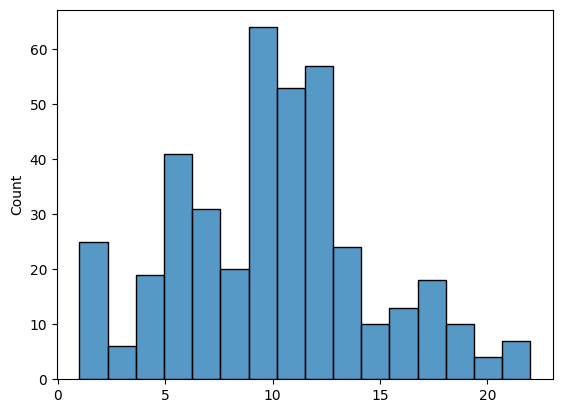

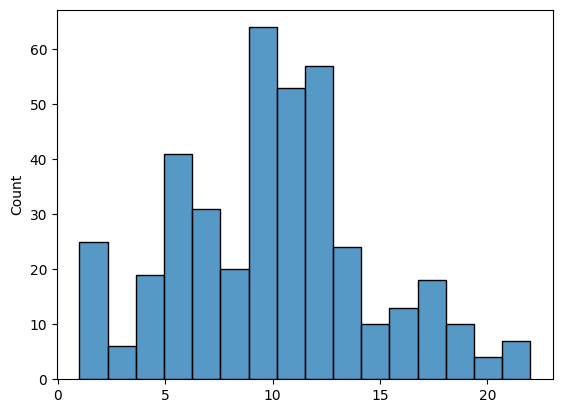

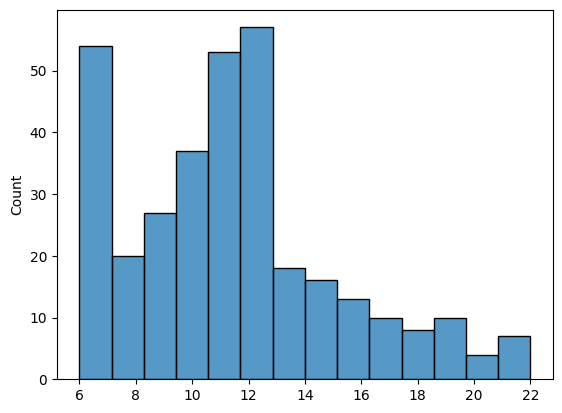

In [13]:
# clear low feild count
feild_count =  df["FC"].values
sns.histplot(feild_count)
plt.show()
df = df.loc[feild_count<23]
sns.histplot(df["FC"].values)
plt.show()
df = df.loc[feild_count>5]
sns.histplot(df["FC"].values)
plt.show()

In [ ]:
##prepare data fro batch analysis
df["sample"] = df["stage"].astype(str) + df["id"].astype(str)  
df = df.drop(columns=["field", "Unnamed: 0",  "pos"])
df.columns

In [ ]:
##batch frame 
data_for_batch = df.groupby(['sample', 'experiment', 'compound', 'stage', 'id'
                             ],as_index=False).agg({'network_average_size':'mean',
                                                    'network_count':'mean',
                                                    'network_total_area':'mean',
                                                    'rod_average_size':'mean', 
                                                    'rod_count':'mean',
                                                    'rod_total_area':'mean',
                                                    'rounded_count':'mean', 'rounded_total_area':'mean',
                                                    'rounded_average_size': 'mean',
                                                    'WC':'sum', 'cell_count':'mean',  'FC':'mean'
                                                                
                                                             })
file2 = 'data_for_batch_mdivi.csv'
data_for_batch.to_csv(file2)

In [4]:
path = ('Results_mdivi_analysis') 
if not os.path.exists(path):
    os.mkdir(path)
    print('Output folder created')

Output folder created


In [ ]:
#next step read - feature interaction for selection
df = pd.read_csv('mito_clean_well_data.csv')

In [ ]:
df["Sample"] = df["stage"].astype(str) + df["id"].astype(str) 
df.set_index(["Sample"], inplace = True,
                             append = True, drop = False)
df.fillna(0, inplace=True)
df.set_index(["Sample"], inplace = True,
                             append = True, drop = False)
df.fillna(0, inplace=True)
df2 = df.groupby(level=1).mean()
df_clean = df2.drop(columns=['cell_count', 'fields'])

In [20]:
df_clean = df2.copy()

In [ ]:
df_normalbymean=(df_clean-df_clean.mean())/df_clean.std()
df_max_scaled = df_clean.copy()
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
df_min_max_scaled = df_clean.copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())   


In [24]:
corleation_list_all = [(df_normalbymean), (df_max_scaled), (df_min_max_scaled)]

In [ ]:
bubble_plot(corleation_list_all)
cor_function(corleation_list_all)

In [26]:
cor = df_normalbymean.corr(method = 'pearson').round(2)

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(df_normalbymean, kind="reg")
plt.savefig(path + '\\' + 'highlightpairplot.pdf', dpi=600)

In [ ]:
## well QC steps

In [ ]:
df = pd.read_csv('mito_data_cleanup.csv')

In [ ]:
CLEAN_SCAT_HEAT_DATA = df.copy()
CLEAN_SCAT_HEAT_DATA = CLEAN_SCAT_HEAT_DATA.drop(columns=['ep', 'experiment', 'plate', 'fields', 'column', 'row'])
CLEAN_SCAT_HEAT_DATA["group"] = CLEAN_SCAT_HEAT_DATA["stage"].astype(str) 
CLEAN_SCAT_HEAT_DATA.set_index(["group"], inplace = True,
                            append = True, drop = False)
CLEAN_SCAT_HEAT_DATA["group_with_id"] = CLEAN_SCAT_HEAT_DATA["stage"].astype(str) + CLEAN_SCAT_HEAT_DATA["id"].astype(str) 
CLEAN_SCAT_HEAT_DATA.set_index(["group_with_id"], inplace = True,
                            append = True, drop = False)
CLEAN_SCAT_HEAT_DATA["group_with_pc"] = CLEAN_SCAT_HEAT_DATA["stage"].astype(str) + CLEAN_SCAT_HEAT_DATA["id"].astype(str) + CLEAN_SCAT_HEAT_DATA["pos"].astype(str)
CLEAN_SCAT_HEAT_DATA.set_index(["group_with_pc"], inplace = True,
                            append = True, drop = False)


In [ ]:
CLEAN_SCAT_HEAT_DATA["group"].value_counts()

In [ ]:
# clear low and high cell count
cell_count =  CLEAN_SCAT_HEAT_DATA["cell_count"].values
sns.histplot(cell_count)
plt.show()
CLEAN_SCAT_HEAT_DATA = CLEAN_SCAT_HEAT_DATA.loc[cell_count<700]
sns.histplot(CLEAN_SCAT_HEAT_DATA["cell_count"].values)
plt.show()
CLEAN_SCAT_HEAT_DATA = CLEAN_SCAT_HEAT_DATA.loc[cell_count>250]
sns.histplot(CLEAN_SCAT_HEAT_DATA["cell_count"].values)
plt.show()

In [ ]:
file_1 =   'df1_ORIGINAL_det_mito_clean.csv'
CLEAN_SCAT_HEAT_DATA.to_csv(file_1)

In [ ]:
#remove unwanted feat&keep features by corelation analysis
CLEAN_SCAT_HEAT_DATA = CLEAN_SCAT_HEAT_DATA.drop(columns=['rounded_fraction', 'rod_fraction', 'network_fraction',
                                                         'pos', 'stage', 'id', 'cell_count',
                                                         'network_count', 'network_total_area', 'rod_count', 'rod_total_area',
                                                         'rounded_count', 'rounded_total_area', 'mitochonria_count_per_cell',
                                                         ])
df_clean = CLEAN_SCAT_HEAT_DATA[['group', 'group_with_id', "group_with_pc",
                           "network_area_per_cell", "network_count_per_cell", "network_average_size",
                          "rod_average_size", "rod_area_per_cell", "rod_count_per_cell",
                          "rounded_average_size", "rounded_area_per_cell", "rounded_count_per_pell",
                          "mitochondria_area_per_cell"]]  

In [ ]:
file_2 =   'df2_ORIGINAL_det_mito_clean.csv'
df_clean.to_csv(file_2)

In [ ]:
df_clean.columns

In [18]:
# OUTLIER DETECTION MODE 
DataFrame_OutliersDetections = df_clean.copy()
types = df_clean["group"].unique()
mask = []
features = df_clean.columns[4:13]
print(types)
# detector_list = ['pca_approx', 'robust_cov']


detector_list = [
    
        (
        "Local Outlier Factor 8",
        LocalOutlierFactor(n_neighbors=8),
    ),
    (
        "Local Outlier Factor 5",
        LocalOutlierFactor(n_neighbors=5),
    ),
        (
         "Local Outlier Factor 30",
        LocalOutlierFactor(n_neighbors=30),
        ),
    ]

['Severe' 'HC' 'PreManifest' 'Mild']


In [19]:
for name, algorithm in detector_list:
    errors = np.full(len(DataFrame_OutliersDetections),fill_value=np.nan)
    outliers = np.full(len(DataFrame_OutliersDetections),fill_value=np.nan)

    for type in types:
        x = DataFrame_OutliersDetections.loc[:,features].values
        F = x.sum(1)
        mask = np.zeros(x.shape[0])
        mask[np.isfinite(F)] = 1
        mask_type = mask * np.array(DataFrame_OutliersDetections["group"] == type)
        Curr_df = DataFrame_OutliersDetections.loc[mask_type==1,features]

        x = Curr_df.values
        if name == 'pca_approx':

            x = StandardScaler().fit_transform(x)
            # F = x.sum(1)
            # x = x[np.isfinite(F),:]
            # mask[1-np.isfinite(F)] = False
            # pd.DataFrame(data = Curr_df, columns = features).head()
            # pca = PCA(n_components=2)
            lower_dimensional_data = algorithm.fit_transform(x)
            pproximation = algorithm.inverse_transform(lower_dimensional_data)

            err = np.linalg.norm(x-pproximation,2,axis=1)

            errors[mask_type==1] = err
            outliers[mask_type==1] = (err < 5) * 2 - 1
            if False:
                plt.scatter(lower_dimensional_data[:,0],lower_dimensional_data[:,1],c=err>5)
                plt.title(type)
                plt.show()
        else:
            algorithm.fit(x)
            if name == "Robust covariance":
                errors[mask_type==1] = algorithm.mahalanobis(x)
                outliers[mask_type==1] = algorithm.predict(x)

            if  "Local Outlier Factor" in name:
                errors[mask_type==1] = algorithm.negative_outlier_factor_
                outliers[mask_type==1] = algorithm.fit_predict(x)
            else:
                y_pred = algorithm.fit(x).predict(x)



        # Curr_df[name] = errors[mask_type==1]
        # Curr_df[f'{name}_outliers'] = outliers[mask_type==1]
        # Curr_df.set_index(name, inplace = True,
        #                         append = True, drop = False)
        # file =   f'{type}_df_outliers_det.csv'
        # Curr_df.to_csv(file)
    DataFrame_OutliersDetections[name] = errors
    DataFrame_OutliersDetections[f'{name}_outliers'] = outliers
    DataFrame_OutliersDetections.set_index(name, inplace = True,
                            append = True, drop = False)

    file3 =   'df3_ORIGINAL_det_mito_clean.csv'
    DataFrame_OutliersDetections.to_csv(file3)


In [ ]:
##keep good wells
df_clean = DataFrame_OutliersDetections[DataFrame_OutliersDetections['Local Outlier Factor 30_outliers'] == 1]
file4 = 'df4_ORIGINAL_det_mito_clean.csv'
df_clean.to_csv(file4)

In [21]:
#define hc  mean data frames 
hc = df_clean[(df_clean['group'] == 'HC')]
hc_mean = hc.mean()
Nh_df = df_clean/hc_mean

C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_20864\4204758423.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [22]:
df_log = df_clean.drop(columns=["group_with_pc", "group", "group_with_id",
                           'Local Outlier Factor 8',
       'Local Outlier Factor 8_outliers', 'Local Outlier Factor 5',
       'Local Outlier Factor 5_outliers', 'Local Outlier Factor 30',
       'Local Outlier Factor 30_outliers'])
for col in df_log:
    df_log[col] = np.log(df_log[col])
    NL_df = df_log.copy()

In [23]:
df_log_2 = df_clean.drop(columns=["group_with_pc", "group", "group_with_id",
                           'Local Outlier Factor 8',
       'Local Outlier Factor 8_outliers', 'Local Outlier Factor 5',
       'Local Outlier Factor 5_outliers', 'Local Outlier Factor 30',
       'Local Outlier Factor 30_outliers'])
for col in df_log_2:
        df_log_2[col] = np.log(1+df_log_2[col]-min(df_log_2[col]))
        NL2_df = df_log_2.copy()

In [24]:
df_max_scaled = df_clean.drop(columns=["group_with_pc", "group", "group_with_id",
                           'Local Outlier Factor 8',
       'Local Outlier Factor 8_outliers', 'Local Outlier Factor 5',
       'Local Outlier Factor 5_outliers', 'Local Outlier Factor 30',
       'Local Outlier Factor 30_outliers'])
for column in df_max_scaled.columns:
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
        NM_df = df_max_scaled.copy()

In [45]:
#initialze the excel writer
writer = pd.ExcelWriter(path + '//' + 'normalzied-excel.xlsx', engine='xlsxwriter')

    #store your dataframes in a  dict, where the key is the sheet name you want
frames = {'hc': Nh_df, 'log': NL_df, 'log2':NL2_df,
              'max': NM_df}
    #frames = {'HCUN': HCUN, 'DSUN': DSUN}
    #now loop thru and put each on a specific sheet
for sheet, frame in  frames.items(): # .use .items for python 3.X
    frame.to_excel(writer, sheet_name = sheet)

    #critical last step
writer.save()
    #writer.close()
print('done')
#'24_1': N_df_24_1

done


C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_15220\393893059.py:13: FutureWarning:

save is not part of the public API, usage can give unexpected results and will be removed in a future version



In [ ]:
##feature qc 
df_var_calc = df_clean.copy()
df_var_calc = df_var_calc.drop(columns=['Local Outlier Factor 30', 'Local Outlier Factor 30_outliers',
       'Local Outlier Factor 5', 'Local Outlier Factor 5_outliers',
       'Local Outlier Factor 8', 'Local Outlier Factor 8_outliers', 'group',
       'group_with_id', 'group_with_pc'])
df_var_calc

In [ ]:
#variance of each feature
feature_variances = df_var_calc.var()

#standard deviation of each feature
feature_std_devs = df_var_calc.std()

#coefficient of variation (CV) for each feature,
feature_cv = df_var_calc.std() / df_var_calc.mean()

# Print the results
print("Feature Variance:")
print(feature_variances)

print("\nFeature Standard Deviation:")
print(feature_std_devs)

print("\nFeature Coefficient of Variation (CV):")
print(feature_cv)


feature_variances.to_csv('feature_variances.csv')
feature_std_devs.to_csv('feature_std_devs.csv')
feature_cv.to_csv('feature_coefficient_of_variation.csv')

In [ ]:
# Visualization
# Plot feature variances
plt.bar(range(len(feature_variances)), feature_variances, align='center')
plt.xticks(range(len(feature_variances)), feature_variances.index, rotation=45)
plt.title('Feature Variance')
plt.ylabel('Variance')
plt.xlabel('features')
plt.show()
plt.savefig(path + '//' + "feature_var.pdf", dpi = 600)
plt.close()
print("var_done!")

In [ ]:
# Plot feature standard deviations
plt.bar(range(len(feature_std_devs)), feature_std_devs, align='center')
plt.xticks(range(len(feature_std_devs)), feature_std_devs.index, rotation=45)
plt.title('Feature Standard Deviation')
plt.ylabel('Standard Deviation')
plt.xlabel('features')
plt.show()
plt.savefig(path + '//' + "feature_sd.pdf", dpi = 600)
plt.close()
print("sd_done!")


In [ ]:
# Plot feature coefficient of variation (CV)
plt.bar(range(len(feature_cv)), feature_cv, align='center')
plt.xticks(range(len(feature_cv)), feature_cv.index, rotation=45)
plt.title('Feature Coefficient of Variation (CV)')
plt.ylabel('Coefficient of Variation')
plt.xlabel('features')
plt.show()
plt.savefig(path + '//' + "feature_cv.pdf", dpi = 600)
plt.close()
print("cv_done!")

plt.tight_layout()
plt.show()

In [ ]:
### make sure to groupby mean before plotting

In [ ]:
df_plot = df_clean.groupby(level=2).mean()
df_plot = df_plot.reset_index()

In [ ]:
for col in df_plot:
    
    fig = px.bar(df_plot, x = "group_with_id", y = col,
            barmode = 'group')
    fig.write_image(path + '//' + f"{col}mid_plot_image.pdf", engine="kaleido")
    fig.show()

In [ ]:
dist_check_if_hc(Nh_df)
dist_check_if_log(df_log)
dist_check_if_log_2(df_log_2)
dist_check_if_max(df_max_scaled)

In [ ]:
## choose norm and upload for analysis 

In [4]:
path = ('mito_upstream') 
if not os.path.exists(path):
    os.mkdir(path)
    print('Output folder created')

Output folder created


In [ ]:
##fract calc and vis

In [ ]:
df2 = pd.read_csv('adam_sep_final/fraction_final.csv')

In [ ]:
##fraction plots+CIs

In [ ]:
#compute CI for fraction
confidence_intervals = df2.groupby('group').agg({
    'network_fraction': confidence_interval,
    'rod_fraction': confidence_interval,
    'rounded_fraction':confidence_interval
}).rename(columns={
    'network_fraction': ('network_fraction_lower', 'network_fraction_upper'),
    'rod_fraction': ('rod_fraction_lower', 'rod_fraction_upper'),
    'rounded_fraction': ('rounded_fraction_lower', 'rounded_fraction_upper')
    
}).reset_index()

df_new = pd.merge(df2, confidence_intervals, on='group')

In [ ]:
df_new["group"].value_counts()

In [77]:
df_new.columns

Index([                                             'group',
                                         'network_fraction',
                                             'rod_fraction',
                                         'rounded_fraction',
       ('network_fraction_lower', 'network_fraction_upper'),
               ('rod_fraction_lower', 'rod_fraction_upper'),
       ('rounded_fraction_lower', 'rounded_fraction_upper')],
      dtype='object')

In [ ]:
df_new = df_new.groupby('group', as_index=False).mean()
df_new.to_csv('group_fraction_cis.csv', index=False)

In [8]:
df_fract_ci = pd.read_csv('adam_fraction_ci.csv')

In [9]:
df_fract_ci.set_index(["group"], inplace = True,
                           append = True, drop = True)
df_fract_ci = df_fract_ci *100
df_fract_ci = df_fract_ci.reset_index()

In [ ]:
# Create a figure
fig = go.Figure()

for feature in ["network_fraction", "rod_fraction", "rounded_fraction"]:
    feature_lower_col = f"{feature}_lower"
    feature_upper_col = f"{feature}_upper"
   
    fig.add_trace(go.Bar(
        x=df_fract_ci["group"],
        y=df_fract_ci[f'{feature}'],
        name=feature,
        text=None,  # Hide the text on the bars
        error_y=dict(
            type='data',
            symmetric=False,
            array=df_fract_ci[feature_upper_col] - df_fract_ci[f'{feature}'],
            arrayminus=df_fract_ci[f'{feature}'] - df_fract_ci[feature_lower_col],
            visible=True,
            thickness=1,
            color = "purple",
           
            # Increase the thickness of the error bars
        ),
        hoverinfo='text+name',
    ))

# Customize the layout
fig.update_layout(
    title="Title",
    xaxis=dict(categoryorder='array', categoryarray=['HC', 'PreManifest', 'Mild', 'Severe']),
    barmode='stack',  # Stack bars by 'group' column
)

# Save or display the plot
fig.write_image(path + '//' + "_plot.pdf", engine="kaleido")
fig.show()

In [ ]:
## PROCCESING AND FINAL STATS 

In [ ]:
df = pd.read_csv('adam_may_final_frame/final_frame_log.csv')
df["group"].value_counts()

In [24]:
df_stats = df.copy()
df_stats.columns

Index(['net_avg_size_N', 'rod_avg_size_N', 'rounded_avg_size_N',
       'net_count_per_cell_N', 'rod_count_per_cell_N',
       'rounded_count_per_cell_N'],
      dtype='object')

In [ ]:
### box plots all feat
for col in df_stats.columns[3:]:
    
    fig = px.box(df_stats, x = "group", y = col, 
                 points="all", color="group",
            notched=True)
    fig.update_xaxes(categoryorder='array', categoryarray= ['HC', 'PreManifest', 'Mild', 'Severe'])
    fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
    fig.update_layout(
    font_family="Arial",
    font_color="Black",
    font_size=20,
    font=dict(
        family="Arial",
        size=20,
        color="Black"
    )
)

    fig.write_image(path + '//' + f"{col}box_plot_image.pdf", engine="kaleido")
    fig.show()

In [ ]:
### move on from here

In [ ]:
#indexing for multivariate
df["index"] = df["DS"].astype(str) + df["group"].astype(str) 
df["index2"] = df["DS"].astype(str) + df["group_with_id"].astype(str)

In [ ]:
# PCA+cor analysis

In [ ]:
PCA_DATA_CLEAN = df.copy()
PCA_DATA_CLEAN = PCA_DATA_CLEAN.groupby('index2', as_index=False).mean()

In [48]:
#PCA1

,PC1,PC2,Feature
0,0.442381,0.153336,rounded_count_per_cell_N
1,0.438054,0.080156,net_count_per_cell_N
2,0.418455,0.318275,net_avg_size_N
3,0.417536,0.062380,rod_avg_size_N
4,0.383429,0.501460,rod_count_per_cell_N
5,0.340513,0.783205,rounded_avg_size_N


C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_18252\3672307811.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



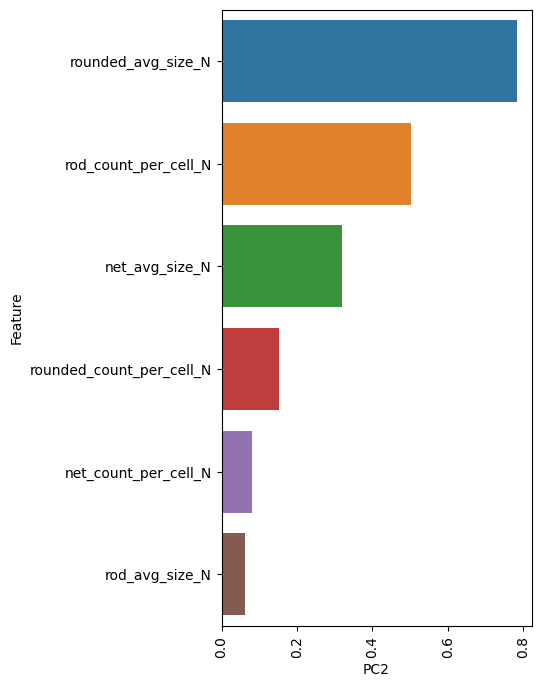

C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_18252\3672307811.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator



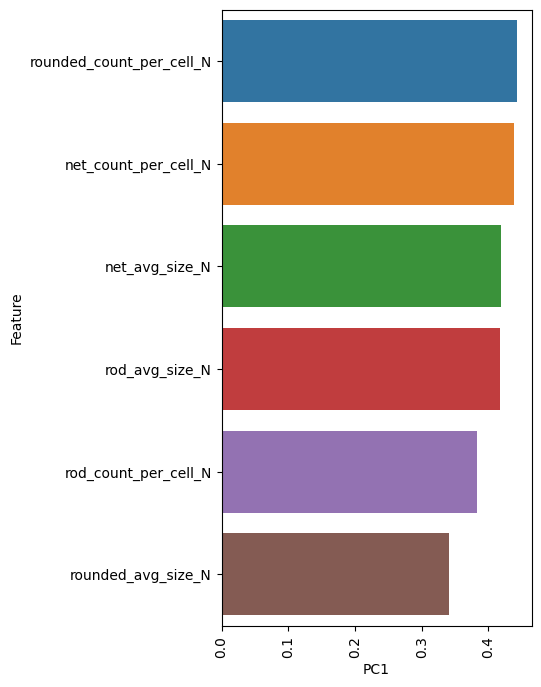

[0.79119605 0.10350944]


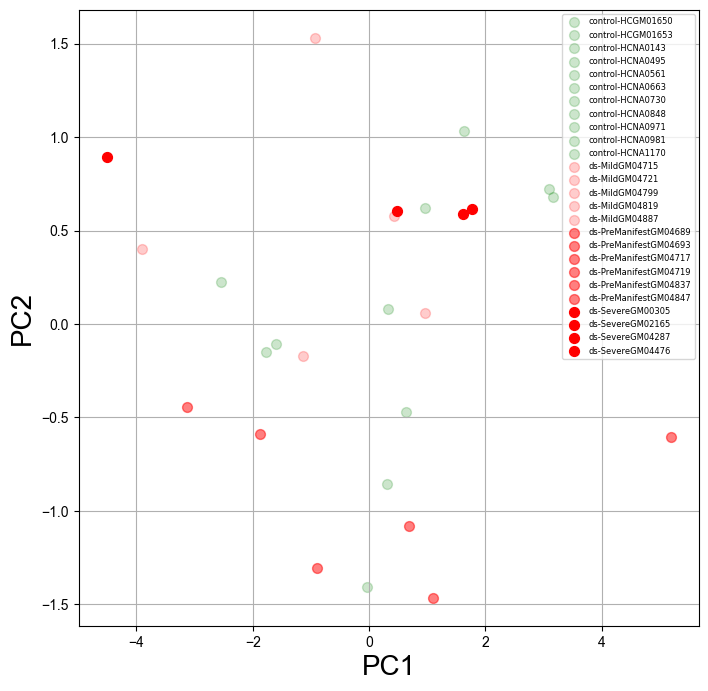

In [62]:
features = PCA_DATA_CLEAN.columns[1:]
x = PCA_DATA_CLEAN.loc[:, features].values
y = PCA_DATA_CLEAN.loc[:,['index2']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
PCA_DATA_COMP = pd.DataFrame(data = principalComponents
               , columns = ['principal component 1', 'principal component 2'])
importances = pd.DataFrame(data = abs(pca.components_).transpose(), columns = ['PC1', 'PC2'])
importances['Feature'] = features
display(importances.sort_values('PC1', ascending = False).reset_index(drop = True))
imp = importances.sort_values('PC2', ascending = False)[0:30]
ax1 = sns.barplot(x = 'PC2', y = 'Feature', data = imp)
  
fig = ax1.get_figure()
fig.set_size_inches(4, 8)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90) 
plt.savefig(path + '\\' + 'pca1importancefeat1.pdf', dpi=600 )
plt.show()
imp2 = importances.sort_values('PC1', ascending = False)[0:30]
ax2 = sns.barplot(x = 'PC1', y = 'Feature', data = imp2)
fig = ax2.get_figure()
fig.set_size_inches(4, 8)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.savefig(path + '\\' + 'pca1importancefeat2.pdf', dpi=600 )
plt.show()

PCA_DATA_FINAL = pd.concat([PCA_DATA_COMP, PCA_DATA_CLEAN['index2']], axis = 1)
PCA_FIG = plt.figure(figsize = (8,8))
ax1 = PCA_FIG.add_subplot(1,1,1) 
ax1.set_xlabel('PC1', fontsize = 20, fontname="Arial")
ax1.set_ylabel('PC2', fontsize = 20, fontname="Arial")
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")

types = PCA_DATA_FINAL["index2"].unique()
targets1 = [index for index in types]
reds = list( Color("red").range_to(Color("white"),6))
greens = list( Color("green").range_to(Color("white"),6))
blues = list( Color("blue").range_to(Color("white"),6))

for target in targets1:
    if 'control' == target[:6]:
        color = blues[0] 
    elif 'ds' in target[:2]:
        color = reds[0] 
    else:
        color = greens[0]
    ## get saturation according time...
    if 'Severe' in target:
        alpha = 1
    elif 'Pre' in target:
        alpha = 0.5    
    else:
        alpha = 0.2
        
    

    indicesToKeep = PCA_DATA_FINAL['index2'] == target
    ax1.scatter(PCA_DATA_FINAL.loc[indicesToKeep, 'principal component 1']
            , PCA_DATA_FINAL.loc[indicesToKeep, 'principal component 2']
            , c = mpl.colors.to_hex(str(color)), alpha=alpha
            , s = 50)
scale = 6    
ax1.legend(targets1*scale,fontsize=6)
ax1.grid()



print(pca.explained_variance_ratio_)
plt.savefig(path + '\\' + 'pca3.pdf', dpi=600 )
plt.show()

In [48]:
#PCA2

In [ ]:
PCA_DATA_CLEAN = df.copy()
PCA_DATA_CLEAN = PCA_DATA_CLEAN.groupby('index', as_index=False).mean()

,PC1,PC2,Feature
0,0.527643,0.108964,rod_avg_size_N
1,0.526327,0.025711,rounded_avg_size_N
2,0.476859,0.182733,net_count_per_cell_N
3,0.337537,0.441149,rounded_count_per_cell_N
4,0.233112,0.625222,net_avg_size_N
5,0.221148,0.607091,rod_count_per_cell_N


C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_18252\1288960859.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



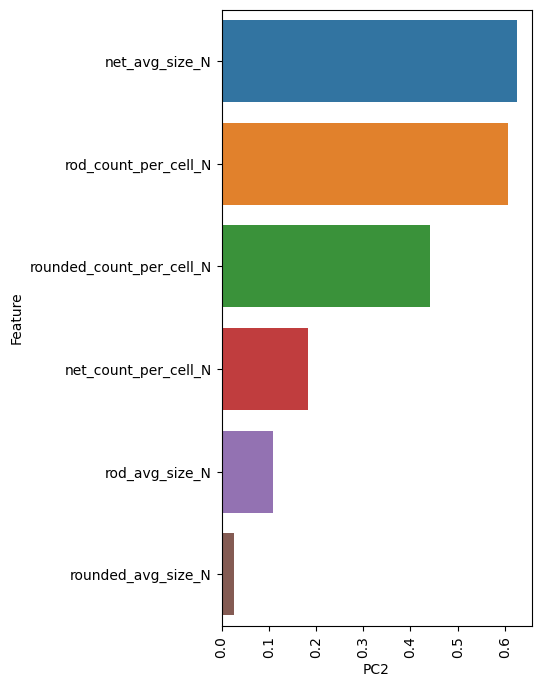

C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_18252\1288960859.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator



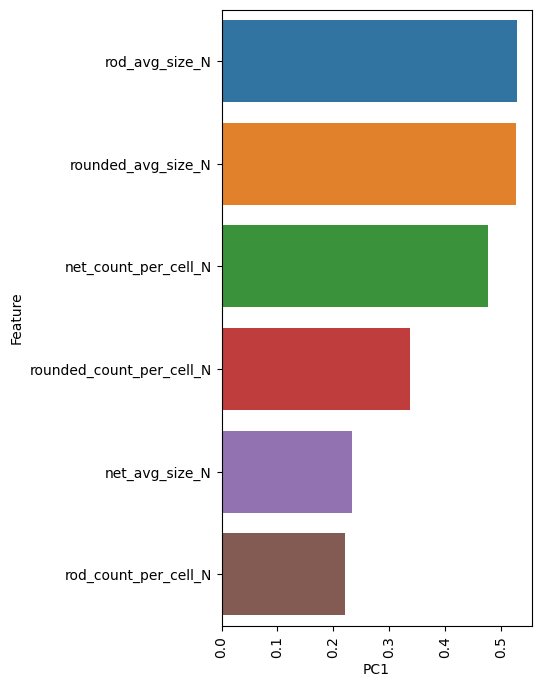

[0.52980299 0.34487553]


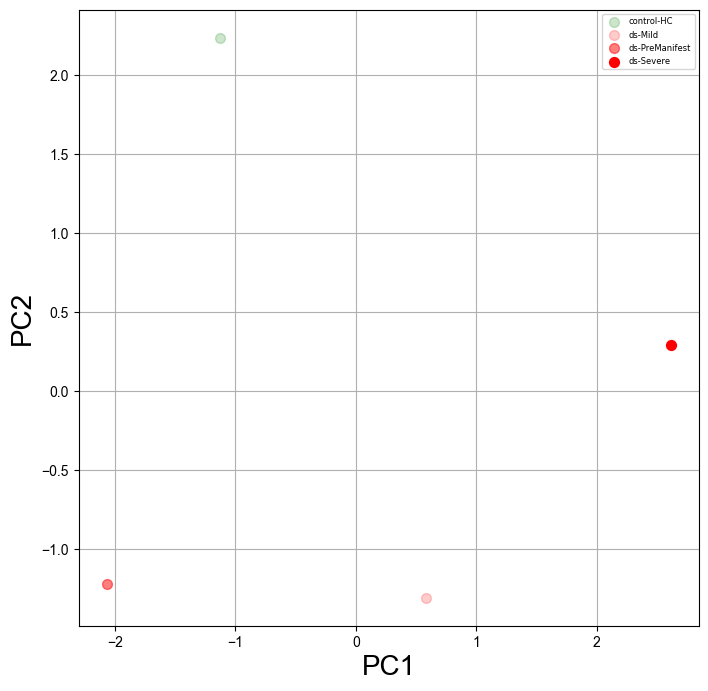

In [66]:
features = PCA_DATA_CLEAN.columns[1:]
x = PCA_DATA_CLEAN.loc[:, features].values
y = PCA_DATA_CLEAN.loc[:,['index']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
PCA_DATA_COMP = pd.DataFrame(data = principalComponents
               , columns = ['principal component 1', 'principal component 2'])
importances = pd.DataFrame(data = abs(pca.components_).transpose(), columns = ['PC1', 'PC2'])
importances['Feature'] = features
display(importances.sort_values('PC1', ascending = False).reset_index(drop = True))
imp = importances.sort_values('PC2', ascending = False)[0:30]
ax1 = sns.barplot(x = 'PC2', y = 'Feature', data = imp)
  
fig = ax1.get_figure()
fig.set_size_inches(4, 8)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90) 
plt.savefig(path + '\\' + 'pca1importancefeat1-group.pdf', dpi=600 )
plt.show()
imp2 = importances.sort_values('PC1', ascending = False)[0:30]
ax2 = sns.barplot(x = 'PC1', y = 'Feature', data = imp2)
fig = ax2.get_figure()
fig.set_size_inches(4, 8)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.savefig(path + '\\' + 'pca1importancefeat2-group.pdf', dpi=600 )
plt.show()

PCA_DATA_FINAL = pd.concat([PCA_DATA_COMP, PCA_DATA_CLEAN['index']], axis = 1)
PCA_FIG = plt.figure(figsize = (8,8))
ax1 = PCA_FIG.add_subplot(1,1,1) 
ax1.set_xlabel('PC1', fontsize = 20, fontname="Arial")
ax1.set_ylabel('PC2', fontsize = 20, fontname="Arial")
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")

types = PCA_DATA_FINAL["index"].unique()
targets1 = [index for index in types]
reds = list( Color("red").range_to(Color("white"),6))
greens = list( Color("green").range_to(Color("white"),6))
blues = list( Color("blue").range_to(Color("white"),6))

for target in targets1:
    if 'control' == target[:6]:
        color = blues[0] 
    elif 'ds' in target[:2]:
        color = reds[0] 
    else:
        color = greens[0]
    ## get saturation according time...
    if 'Severe' in target:
        alpha = 1
    elif 'Pre' in target:
        alpha = 0.5    
    else:
        alpha = 0.2
        
    

    indicesToKeep = PCA_DATA_FINAL['index'] == target
    ax1.scatter(PCA_DATA_FINAL.loc[indicesToKeep, 'principal component 1']
            , PCA_DATA_FINAL.loc[indicesToKeep, 'principal component 2']
            , c = mpl.colors.to_hex(str(color)), alpha=alpha
            , s = 50)
scale = 6    
ax1.legend(targets1*scale,fontsize=6)
ax1.grid()



print(pca.explained_variance_ratio_)
plt.savefig(path + '\\' + 'pca_group.pdf', dpi=600 )
plt.show()

In [23]:
#LDA

In [ ]:
PCA_DATA_CLEAN = df.copy()
PCA_DATA_CLEAN["group"].value_counts()

C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_18252\3718005800.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Figure size 640x480 with 0 Axes>

C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_18252\3718005800.py:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



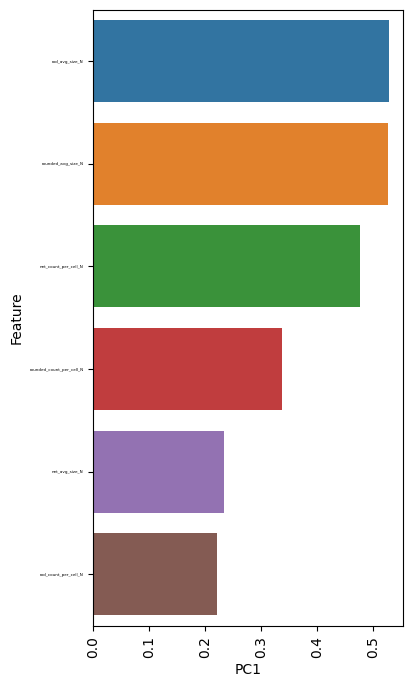

[0.65963475 0.22098138]


<Figure size 640x480 with 0 Axes>

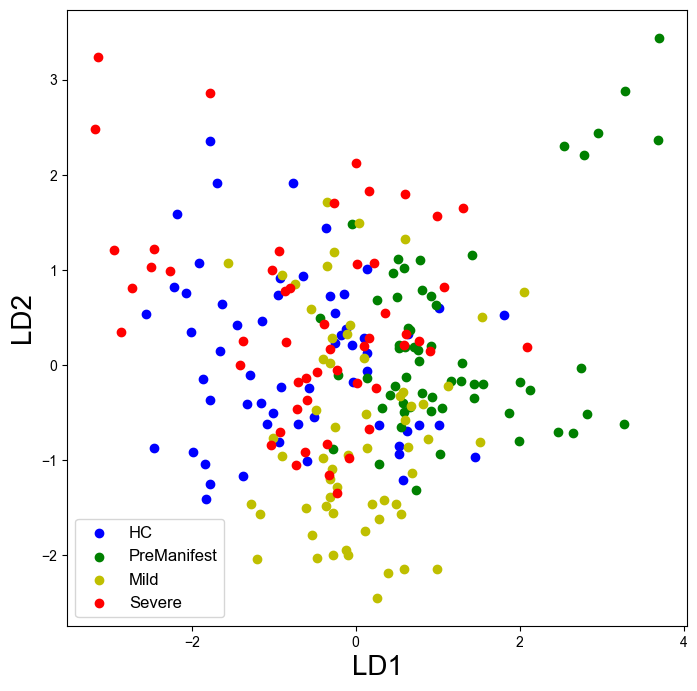

In [76]:
x = PCA_DATA_CLEAN.loc[:, features].values
y = PCA_DATA_CLEAN.loc[:,['group']].values
y = np.array([0 if('H' == y_i[0][0:1]) else 1 if  'P' in y_i[0][0:1] else 2 if  'M' in y_i[0][0:1] else 3 for y_i in y])

y[0]=2
x = StandardScaler().fit_transform(x)

lda = LDA(n_components=2)
lda_x = np.array(lda.fit(x, y).transform(x))


# importances = pd.DataFrame(data = abs(lda.scalings_), columns = ['PC1', 'PC2'])
# importances['Feature'] = features
# display(importances.sort_values('PC1', ascending = False).reset_index(drop = True))
# imp = importances.sort_values('PC2', ascending = False)[0:30]
# ax1 = sns.barplot(x = 'PC2', y = 'Feature', data = imp)
    
fig = ax1.get_figure()
fig.set_size_inches(4, 8)
plt.rc('ytick', labelsize=3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)  
plt.savefig(path + '\\' + 'LDA1importancefeat1.pdf', dpi=600)
plt.show()
imp2 = importances.sort_values('PC1', ascending = False)[0:30]
ax2 = sns.barplot(x = 'PC1', y = 'Feature', data = imp2)
fig = ax2.get_figure()
fig.set_size_inches(4, 8)
plt.rc('ytick', labelsize=3)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90) 
plt.savefig(path + '\\' + 'LDA1importancefeat2.pdf', dpi=600)
plt.show()

font = {'family' : 'Arial',
        'size'   : 22}

plt.rc('font', **font)
scale = 6

target_names= ['HC', 'PreManifest', 'Mild', 'Severe']
plt.figure()
plt.figure(figsize = (8,8))
for c, i, target_name in zip("bgyr", [0, 1, 2, 3], target_names):
    plt.scatter(lda_x[y == i,0] , lda_x[y == i,1] , c=c, label=target_name)
    plt.legend(target_names*scale,fontsize=12)
#     plt.title('LDA of dataset')
    plt.xlabel('LD1', fontsize = 20, family = 'Arial')
    plt.ylabel('LD2', fontsize = 20, family = 'Arial')
    plt.yticks(family = 'Arial', size = 10)
    plt.xticks(family = 'Arial', size= 10)
print(lda.explained_variance_ratio_)            
plt.savefig(path + '\\' + 'LDA.pdf', dpi=600 )
plt.show()

In [ ]:
##cor-FINAL

In [85]:
cor = df.copy()
cor.set_index(["group_with_id"], inplace = True,
                             append = True, drop = False)
cor.fillna(0, inplace=True)
cor = cor.groupby(level=1).mean()

In [91]:
corleation_list_all = [(cor)]

In [ ]:
cor_function(corleation_list_all)
bubble_plot(corleation_list_all)